# CNN and filters 

### Element-wise multiplication

element-wise multiplication between the filter-sized patch of the input and filter, which is then summed, always resulting in a single value. This filter has to be design to detect specific type of feature in image, in other words specific pattern on the image.

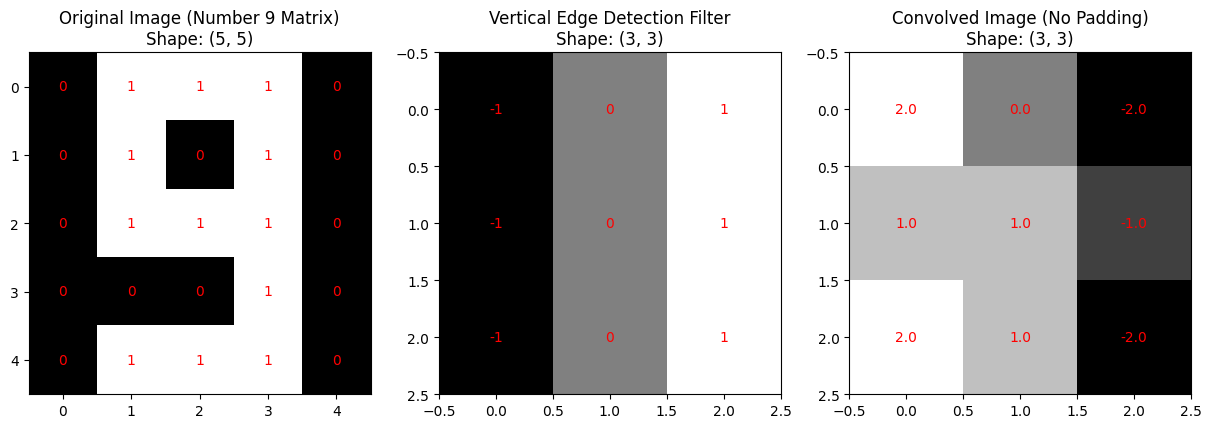

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define a static matrix representing the number 9
number_9 = np.array([
    [0, 1, 1, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 1, 1, 0]
])

# Define a simple vertical edge detection filter. Specific type of filter designed to detect vertical edges in images. 
#The first column (-1, -1, -1) is designed to respond strongly to pixels on one side of a vertical edge.
#The second column (0, 0, 0) is neutral, providing no response to uniform areas.
#The third column (1, 1, 1) responds strongly to pixels on the opposite side of a vertical edge.
vertical_edge_filter = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

# Function to perform the convolution operation without padding

def convolve2d_no_padding(image, kernel):
    """_summary_
    When this filter is convolved over an image, it calculates the difference in pixel 
    intensity between the left and right sides of the area under the filter.
    
    If there is a vertical edge in the image, there will be a significant difference in intensity between the left and right sides of the edge.
    This difference results in a high value in the feature map at the edge's location.
    
    The -1 values enhance the detection of one side of the edge, while the 1 values enhance the other side, 
    making the filter sensitive to vertical transitions in pixel intensity from left to right.
    
    """
    
    # Calculating the size of the output based on the image and kernel sizes
    # The output size is smaller than the input image size due to lack of padding
    output_size = (
        image.shape[0] - kernel.shape[0] + 1, 
        image.shape[1] - kernel.shape[1] + 1
    )
    
    output = np.zeros(output_size)  # Output array with reduced size

    for x in range(output_size[1]):
        for y in range(output_size[0]):
            # Applying the convolution operation:
            # Element-wise multiplication of the kernel with the corresponding image region
            # and summing the results to get a single value         
                       
            #kernel or filter:            
            #array([[-1,  0,  1],
            #       [-1,  0,  1],
            #       [-1,  0,  1]])
                      
            #image[y:y+3, x:x+3] or patch:
            #array([[0, 1, 1],
            #       [0, 1, 0],
            #       [0, 1, 1]])

            # use ELEMENT-WISE multiplication (denoted by * in NumPy) instead of matrix multiplication                           
            # kernel * image[y:y+3, x:x+3])  
            #array([[0, 0, 1],
            #       [0, 0, 0],
            #       [0, 0, 1]])
            
            
            #(kernel * image[y:y+3, x:x+3]).sum() = 2            
            output[y, x] = (kernel * image[y:y+3, x:x+3]).sum()

    return output

def plot_filter_and_feature_map(number_9, vertical_edge_filter, convolved_image_no_padding):
    # Display the matrices along with their values in each cell
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Original number 9 matrix
    axs[0].set_title(f"Original Image (Number 9 Matrix)\nShape: {number_9.shape}")
    axs[0].imshow(number_9, cmap='gray')
    for (j, i), val in np.ndenumerate(number_9):
        axs[0].text(i, j, int(val), ha='center', va='center', color='red')

    # Vertical edge detection filter matrix
    axs[1].set_title(f"Vertical Edge Detection Filter\nShape: {vertical_edge_filter.shape}")
    axs[1].imshow(vertical_edge_filter, cmap='gray', interpolation='none')
    for (j, i), val in np.ndenumerate(vertical_edge_filter):
        axs[1].text(i, j, int(val), ha='center', va='center', color='red')

    # Convolved image (without padding)
    axs[2].set_title(f"Convolved Image (No Padding)\nShape: {convolved_image_no_padding.shape}")
    axs[2].imshow(convolved_image_no_padding, cmap='gray')
    for (j, i), val in np.ndenumerate(convolved_image_no_padding):
        axs[2].text(i, j, f"{val:.1f}", ha='center', va='center', color='red')


    plt.show()

# Call the function with the relevant matrices
convolved_image_no_padding = convolve2d_no_padding(image=number_9, kernel=vertical_edge_filter)
plot_filter_and_feature_map(number_9, vertical_edge_filter, convolved_image_no_padding)


### Filters normalization

- **Consistent Range of Feature Values:** Useful for handling filters of varying sizes or scales.

- **Improved Training Stability:** Helps prevent excessively large values in feature maps, reducing the risk of exploding gradients.

- **Balancing Contributions of Different Filters:** Ensures that both large and small filters contribute equally to the feature map.

- **Better Generalization:** Prevents filters from overly focusing on specific training data details, like line thickness or digit brightness.

- **Mitigating Overfitting:** Aids in reducing overfitting, contributing to more stable feature map values.

Initial image:
[[0 1 1 1 0]
 [0 1 0 1 0]
 [0 1 1 1 0]
 [0 0 0 1 0]
 [0 1 1 1 0]]
 ### Step  1
Kernel:
-1.00  0.00  1.00
-1.00  0.00  1.00
-1.00  0.00  1.00
Image window:
 0.00  1.00  1.00
 0.00  1.00  0.00
 0.00  1.00  1.00
Convoluted Image:
 0.22  0.00  0.00
 0.00  0.00  0.00
 0.00  0.00  0.00
Kernel:
-1.00  0.00  1.00
-1.00  0.00  1.00
-1.00  0.00  1.00
Image window:
 0.00  1.00  0.00
 0.00  1.00  1.00
 0.00  0.00  0.00
Convoluted Image:
 0.22  0.00  0.00
 0.11  0.00  0.00
 0.00  0.00  0.00
Kernel:
-1.00  0.00  1.00
-1.00  0.00  1.00
-1.00  0.00  1.00
Image window:
 0.00  1.00  1.00
 0.00  0.00  0.00
 0.00  1.00  1.00
Convoluted Image:
 0.22  0.00  0.00
 0.11  0.00  0.00
 0.22  0.00  0.00
 ### Step  2
Kernel:
-1.00  0.00  1.00
-1.00  0.00  1.00
-1.00  0.00  1.00
Image window:
 1.00  1.00  1.00
 1.00  0.00  1.00
 1.00  1.00  1.00
Convoluted Image:
 0.22  0.00  0.00
 0.11  0.00  0.00
 0.22  0.00  0.00
Kernel:
-1.00  0.00  1.00
-1.00  0.00  1.00
-1.00  0.00  1.00
Image window:
 1.00  0.

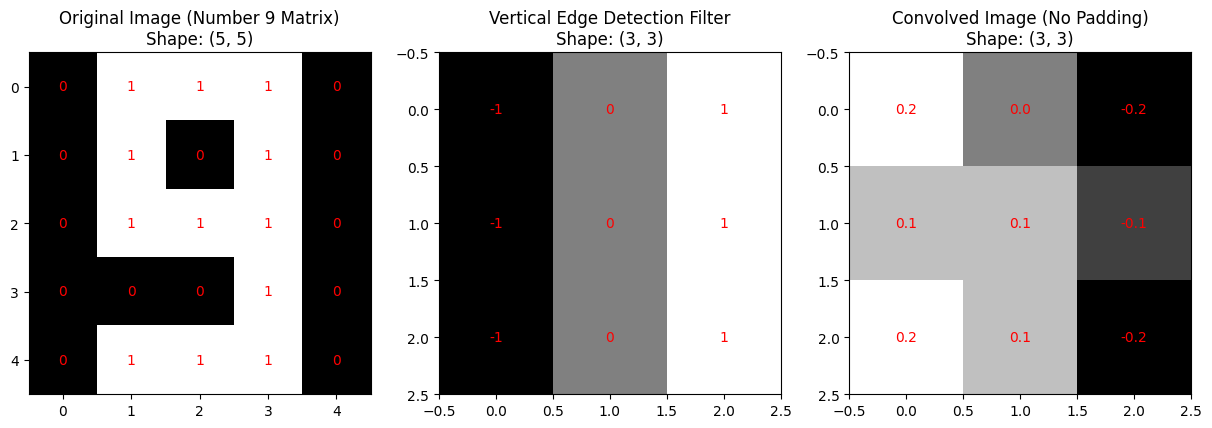

In [7]:
def convolve2d_normalize_no_padding(image, kernel):
    output_size = (
        image.shape[0] - kernel.shape[0] + 1, 
        image.shape[1] - kernel.shape[1] + 1
    )
    
    output_convoluted = np.zeros(output_size)  # Output array with reduced size
    print("Initial image:")
    print(number_9)

    #print("Kernel * image window multiplication:") 
    for x in range(output_size[1]):
        print(" ### Step ",x + 1)
        for y in range(output_size[0]):    
            #Apply filter with Element-Wise multiplication
            output_convoluted[y, x] = ((kernel * image[y:y+3, x:x+3]).sum()) / (kernel.shape[0] * kernel.shape[1]) 
            
            #Print
            kernel_str = '\n'.join([' '.join([f"{item: .2f}" for item in row]) for row in kernel])
            image_window_str = '\n'.join([' '.join([f"{item: .2f}" for item in row]) for row in image[y:y+3, x:x+3]])
            convoluted_img_str = '\n'.join([' '.join([f"{item: .2f}" for item in row]) for row in output_convoluted])
            print(f"Kernel:\n{kernel_str}\nImage window:\n{image_window_str}\nConvoluted Image:\n{convoluted_img_str}")

            
    return output_convoluted

convolved_image_no_padding = convolve2d_normalize_no_padding(image=number_9, kernel=vertical_edge_filter)
plot_filter_and_feature_map(number_9, vertical_edge_filter, convolved_image_no_padding)


# Max Pooling 

- **Function:** Selects the maximum value from a feature map within a specified window (pooling size).

- **Purpose:** Emphasizes the most prominent features in a specific area of the input.

- **Effect on Data:** Reduces the spatial dimensions (width and height) of the input feature map, making the representation smaller and more manageable.

- **Impact on Model:** Helps in making the detection of features invariant to scale and orientation changes.

- **Use Cases:** Often used in models where detection of high-intensity features like edges is crucial.

- **Overfitting:** Helps in reducing overfitting by providing an abstracted form of the representation.

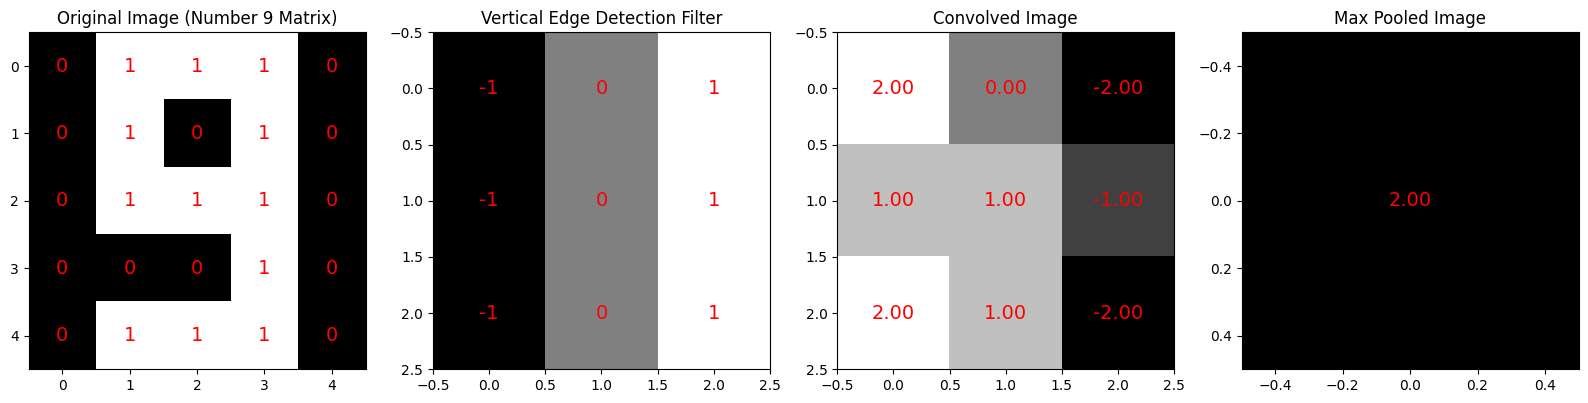

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Existing code ...

# Define the max pooling function
def max_pooling(input_matrix, pool_size):
    # Calculate the shape of the output matrix
    output_shape = (
        input_matrix.shape[0] // pool_size,
        input_matrix.shape[1] // pool_size
    )

    # Initialize the output matrix with zeros
    output_matrix = np.zeros(output_shape)

    # Apply max pooling with proper boundary checks
    for y in range(output_shape[0]):
        for x in range(output_shape[1]):
            # Defining the region for pooling
            start_y, end_y = y * pool_size, (y + 1) * pool_size
            start_x, end_x = x * pool_size, (x + 1) * pool_size
            
            # Apply pooling operation within the defined region
            output_matrix[y, x] = np.max(input_matrix[start_y:end_y, start_x:end_x])

    return output_matrix



# Define the plot_filter_feature_map_average_pooling function
def plot_filter_feature_map_max_pooling(number_9, vertical_edge_filter, convolved_image, pooled_image):
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # Adjusted to 4 subplots

    # Original image
    axs[0].set_title("Original Image (Number 9 Matrix)")
    axs[0].imshow(number_9, cmap='gray')
    for (j, i), val in np.ndenumerate(number_9):
        axs[0].text(i, j, int(val), ha='center', va='center', color='red', fontsize=14)

    # Vertical edge detection filter matrix
    axs[1].set_title("Vertical Edge Detection Filter")
    axs[1].imshow(vertical_edge_filter, cmap='gray', interpolation='none')
    for (j, i), val in np.ndenumerate(vertical_edge_filter):
        axs[1].text(i, j, int(val), ha='center', va='center', color='red', fontsize=14)

    # Convolved image
    axs[2].set_title("Convolved Image")
    axs[2].imshow(convolved_image, cmap='gray')
    for (j, i), val in np.ndenumerate(convolved_image):
        axs[2].text(i, j, f"{val:.2f}", ha='center', va='center', color='red', fontsize=14)

    # Max pooled image
    axs[3].set_title("Max Pooled Image")
    axs[3].imshow(pooled_image, cmap='gray')
    for (j, i), val in np.ndenumerate(pooled_image):
        axs[3].text(i, j, f"{val:.2f}", ha='center', va='center', color='red', fontsize=14)

    plt.show()

# Apply convolution and max pooling
convolved_image_no_padding = convolve2d_no_padding(number_9, vertical_edge_filter)
max_pooled_image = max_pooling(convolved_image_no_padding, pool_size=2)

# Call the plotting function
plot_filter_feature_map_max_pooling(number_9, vertical_edge_filter, convolved_image_no_padding, max_pooled_image)

# Average Pooling
- **Function:** Calculates the average of the values in a feature map within a specified window (pooling size).

- **Purpose:** Smooths out the image and feature map, focusing on the overall structure rather than specific details.

- **Effect on Data:** Similar to max pooling, it reduces the spatial dimensions but by taking the average, it retains more background information.

- **Impact on Model:** Less aggressive compared to max pooling, retaining more information which can be useful or excessive.

- **Use Cases:** Beneficial in cases where the background and overall texture information are important.

- **Overfitting:** Can potentially retain too much information, leading to less abstract feature representation.

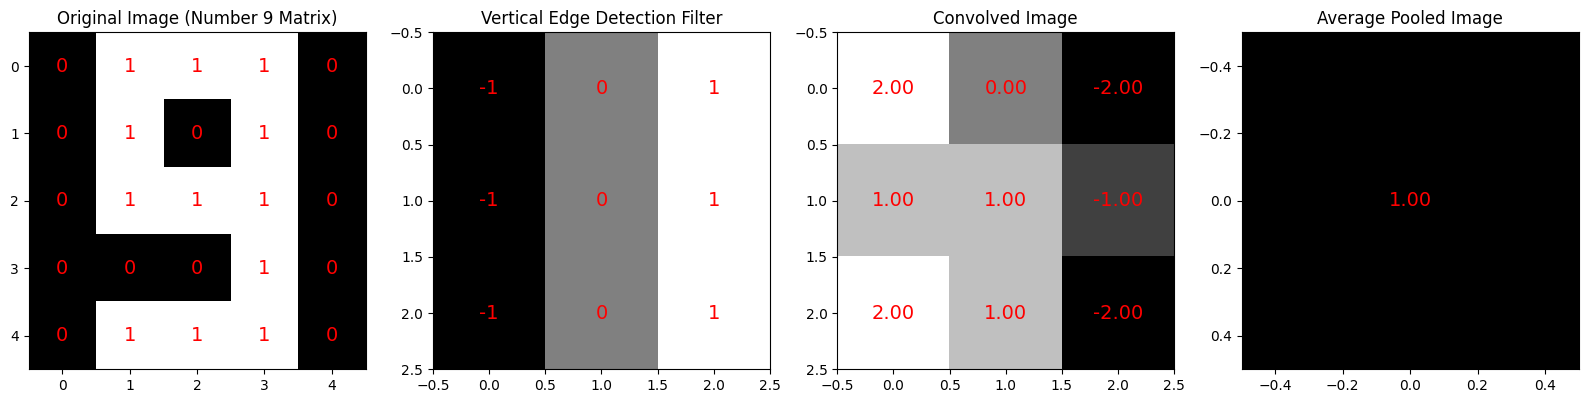

In [19]:
def average_pooling(input_matrix, pool_size):
    """
    This function applies average pooling to the input matrix.

    The pool_size parameter defines the size of the pooling window.
    The function iterates over the input matrix in steps equal to the pool size and
    calculates the average value within each pooling window.

    The result is a smaller matrix where each element is the average value of a
    sub-region in the original matrix.
    """
    # Calculate the shape of the output matrix
    output_shape = (
        input_matrix.shape[0] // pool_size,
        input_matrix.shape[1] // pool_size
    )

    # Initialize the output matrix with zeros
    output_matrix = np.zeros(output_shape)

    # Apply average pooling with proper boundary checks
    for y in range(output_shape[0]):
        for x in range(output_shape[1]):
            # Defining the region for pooling
            start_y, end_y = y * pool_size, (y + 1) * pool_size
            start_x, end_x = x * pool_size, (x + 1) * pool_size
            
            # Apply pooling operation within the defined region
            output_matrix[y, x] = np.mean(input_matrix[start_y:end_y, start_x:end_x])

    return output_matrix

# Define the plot_filter_feature_map_average_pooling function
def plot_filter_feature_map_average_pooling(number_9, vertical_edge_filter, convolved_image, pooled_image):
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # Adjusted to 4 subplots

    # Original image
    axs[0].set_title("Original Image (Number 9 Matrix)")
    axs[0].imshow(number_9, cmap='gray')
    for (j, i), val in np.ndenumerate(number_9):
        axs[0].text(i, j, int(val), ha='center', va='center', color='red', fontsize=14)

    # Vertical edge detection filter matrix
    axs[1].set_title("Vertical Edge Detection Filter")
    axs[1].imshow(vertical_edge_filter, cmap='gray', interpolation='none')
    for (j, i), val in np.ndenumerate(vertical_edge_filter):
        axs[1].text(i, j, int(val), ha='center', va='center', color='red', fontsize=14)

    # Convolved image
    axs[2].set_title("Convolved Image")
    axs[2].imshow(convolved_image, cmap='gray')
    for (j, i), val in np.ndenumerate(convolved_image):
        axs[2].text(i, j, f"{val:.2f}", ha='center', va='center', color='red', fontsize=14)

    # Max pooled image
    axs[3].set_title("Average Pooled Image")
    axs[3].imshow(pooled_image, cmap='gray')
    for (j, i), val in np.ndenumerate(pooled_image):
        axs[3].text(i, j, f"{val:.2f}", ha='center', va='center', color='red', fontsize=14)

    plt.show()


# Step 2: Perform Convolution
convolved_image = convolve2d_no_padding(number_9, vertical_edge_filter)

# Step 3: Perform Max Pooling
average_pooled_image = average_pooling(convolved_image, pool_size=2)

# Call the plotting function
plot_filter_feature_map_average_pooling(number_9, vertical_edge_filter, convolved_image_no_padding, average_pooled_image)

# Padding
In convolutional neural networks (CNNs), padding is typically applied to the original image (or the input feature map at each layer), not to the filter. 
- **Edge Information Preservation:** By padding the input image, you ensure that the convolution operation captures the information at the edges of the image. This is particularly important because the pixels on the edges and corners are otherwise less utilized in the absence of padding.

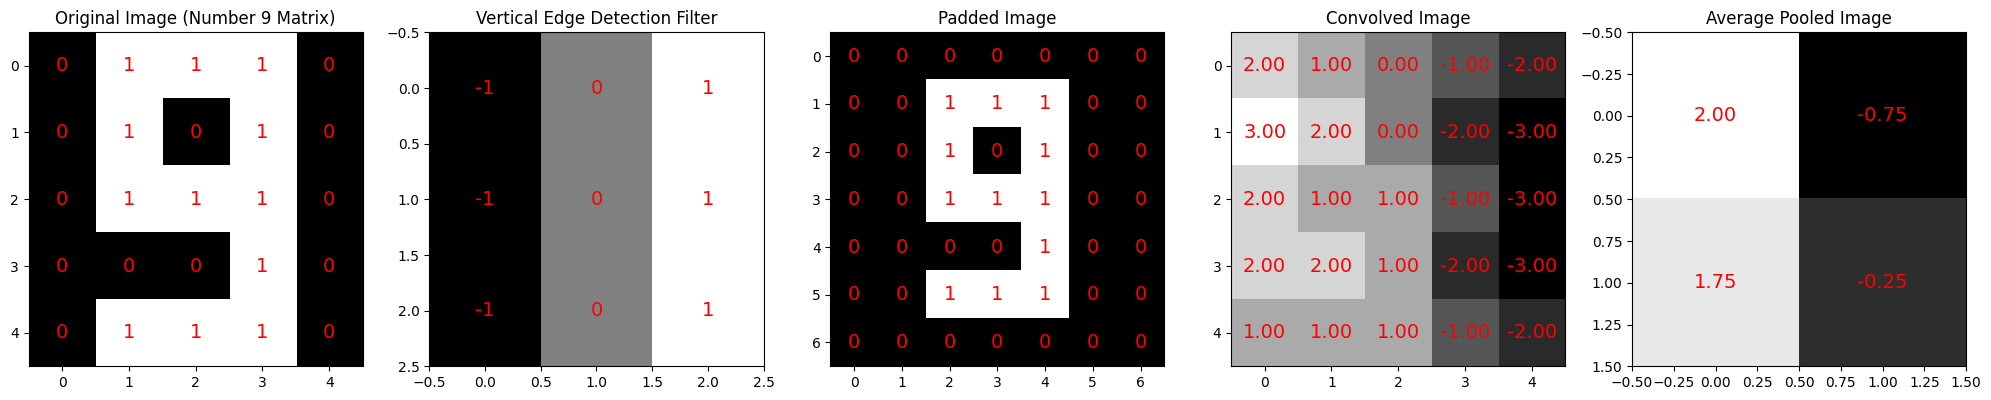

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the padding function
def padding(input_matrix, pad_size):
    """
    Adds zero padding to the input matrix.

    Args:
        input_matrix (numpy.ndarray): The input matrix to be padded.
        pad_size (int): The size of the padding.

    Returns:
        numpy.ndarray: Padded matrix.
    """
    return np.pad(input_matrix, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant', constant_values=0)

# Define the plot_filter_feature_map_average_pooling function
def plot_filter_feature_map_average_pooling(number_9, vertical_edge_filter, padded_image, convolved_image, pooled_image):
    fig, axs = plt.subplots(1, 5, figsize=(25, 5))  # Adjusted to 5 subplots

    # Original image
    axs[0].set_title("Original Image (Number 9 Matrix)")
    axs[0].imshow(number_9, cmap='gray')
    for (j, i), val in np.ndenumerate(number_9):
        axs[0].text(i, j, int(val), ha='center', va='center', color='red', fontsize=14)

    # Vertical edge detection filter matrix
    axs[1].set_title("Vertical Edge Detection Filter")
    axs[1].imshow(vertical_edge_filter, cmap='gray', interpolation='none')
    for (j, i), val in np.ndenumerate(vertical_edge_filter):
        axs[1].text(i, j, int(val), ha='center', va='center', color='red', fontsize=14)

    # Padded image
    axs[2].set_title("Padded Image")
    axs[2].imshow(padded_image, cmap='gray')
    for (j, i), val in np.ndenumerate(padded_image):
        axs[2].text(i, j, int(val), ha='center', va='center', color='red', fontsize=14)

    # Convolved image
    axs[3].set_title("Convolved Image")
    axs[3].imshow(convolved_image, cmap='gray')
    for (j, i), val in np.ndenumerate(convolved_image):
        axs[3].text(i, j, f"{val:.2f}", ha='center', va='center', color='red', fontsize=14)

    # Average pooled image
    axs[4].set_title("Average Pooled Image")
    axs[4].imshow(pooled_image, cmap='gray')
    for (j, i), val in np.ndenumerate(pooled_image):
        axs[4].text(i, j, f"{val:.2f}", ha='center', va='center', color='red', fontsize=14)

    plt.show()

# Assuming number_9, vertical_edge_filter, convolve2d_no_padding,
# average_pooling are already defined

# Apply padding
pad_size = 1  # Adjust pad size as needed
padded_number_9 = padding(number_9, pad_size)

# Perform Convolution with Padding
convolved_image_with_padding = convolve2d_no_padding(padded_number_9, vertical_edge_filter)

# Perform Average Pooling
average_pooled_image = average_pooling(convolved_image_with_padding, pool_size=2)

# Call the plotting function
plot_filter_feature_map_average_pooling(number_9, vertical_edge_filter, padded_number_9, convolved_image_with_padding, average_pooled_image)


#### But what is a convolution?
- https://www.youtube.com/watch?v=KuXjwB4LzSA&ab_channel=3Blue1Brown

- Convolution is a mathematical operation commonly used in **signal processing, image analysis, probability theory**, and various other fields.

- The process of convolution is **integral to systems that perform signal filtering**, analysis, and transformation.

- It **combines two functions to produce a third function** that expresses **how the shape of one is modified by the other**. 


In [11]:
import numpy as np

def conv1d(x, w, p=0, s=1):
    w_rot = np.array(w[::-1])
    x_padded = np.array(x)
    if p > 0:
        zero_pad = np.zeros(shape=p)
        x_padded = np.concatenate([zero_pad, x_padded, zero_pad])
    res = []
    for i in range(0, int(len(x)/s), s):
        res.append(np.sum(x_padded[i:i+w_rot.shape[0]] * w_rot))
    return np.array(res)

## Testing:
x = [1, 3, 2, 4, 5]
w = [1, 0, 3, 1, 2]

print('Conv1d Implementation: ',
      conv1d(x, w, p=2, s=1))
print('Numpy Results:         ',
      np.convolve(x, w, mode='same'))

Conv1d Implementation:  [ 5. 14. 16. 20. 23.]
Numpy Results:          [ 5 14 16 20 23]


# Convolutional Example

### Application: COVID Ventilator Usage

- Set as the percent of patients needing ventilators. For example, F = [.05, .03, .01] means 5% of patients need ventilators the **first week**, 3% the **second week**, and 1% the **third week.**

- Set as the weekly incoming patients, in thousands. G = [10, 20, 30, 20, 10, 10, 10]

- The convolution, shows how many ventilators are needed each week (in thousands). 
 is how many ventilators are needed 5 weeks from now.

See details https://betterexplained.com/articles/intuitive-convolution/

In [20]:
import numpy as np
f = [3, 2, 1]
g = [1, 2, 3, 4, 5]


def convoluve(data, filter1) -> list:
    convoluted_result = []

    # Length of the convoluted result
    result_length = len(data) + len(filter1) - 1

    # Convolution process
    for d in range(result_length):
        sum_conv = 0
        for f in range(len(filter1)):
            # Calculate the index in the data array
            data_index = d - f
            
            # Check if the index is within the bounds of the data array
            if 0 <= data_index < len(data):
                sum_conv += filter1[f] * data[data_index]
        
        convoluted_result.append(sum_conv)

    return convoluted_result
            
            
    
# Let's call our treatment plan  f(x) In our example, we used [3 2 1].
conv_res = np.convolve(f, g)
conv_res2 = convoluve(g,f)
print(conv_res)
print(conv_res2)



[ 3  8 14 20 26 14  5]
[3, 8, 14, 20, 26, 14, 5]


# Image Filtered Example




(790, 798, 3)
(790, 798)
255


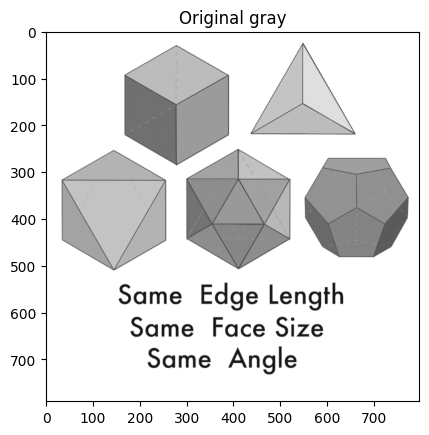

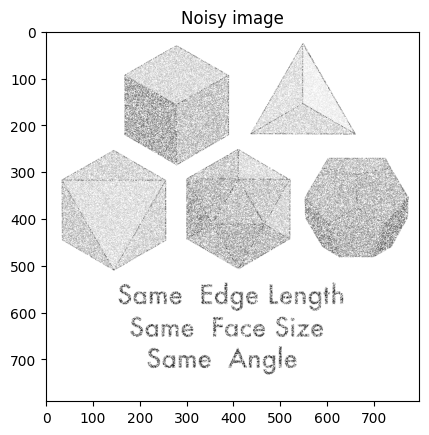

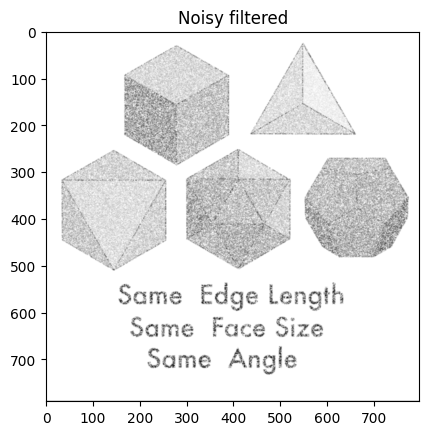

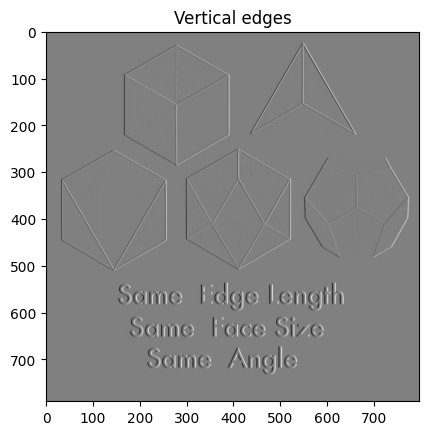

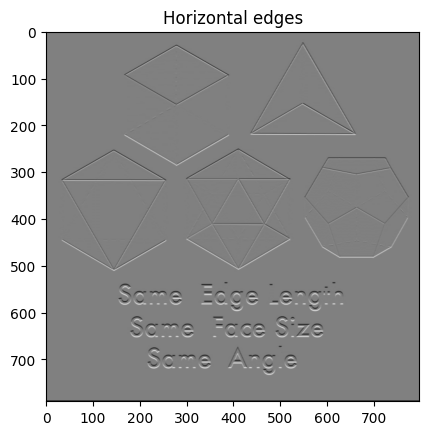

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import convolve2d


def dislay_img(img, title):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()

# Step 1: Read the image
#img = cv2.imread('./img/5/platonic_solids_before_plato.png')
img_RGB = cv2.imread('./img/5/platonic_solids.png')
print(img_RGB.shape)

img_gray = cv2.cvtColor(img_RGB, cv2.COLOR_BGR2GRAY)
print(img_gray.shape)
print(img_gray[100, 100])
dislay_img(img_gray, 'Original gray')


def add_noise(img):    
    # Step 1: Create Gaussian noise
    mean = 0
    std = 10  # Standard deviation of the noise
    gaussian_noise = np.random.normal(mean, std, img.shape).astype(np.uint8)
    # Step 2: Add the noise to the image
    noisy_image = cv2.add(img_gray, gaussian_noise)
    # Step 4: Display or save the noisy image
    # Display the image
    return noisy_image
    


#Filters
# Gaussian Filter (3x3)
gaussian_filter = np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]]) / 16

filter_vertical_edges = np.array([[1, 0, -1],
                                  [2, 0, -2],
                                  [1, 0, -1]])

filter_horizontal_edges = np.array([[1, 2, 1],
                                    [0, 0, 0],
                                    [-1, -2, -1]])

filter_s4 = np.array([[-1, -1, -1],
                      [-1, 8, -1],
                     [ -1, -1, -1]])

filter1_s5 = np.array([[0, 0, 0],
                       [1, 0, -1],
                       [0, 0, 0]])

#Apply filters 
img_noised = add_noise(img_gray)
dislay_img(img_noised, "Noisy image")

img_noise_filtered = convolve2d(img_noised, gaussian_filter, mode='same')
dislay_img(img_noise_filtered, "Noisy filtered")

img_vert_edges = convolve2d(img_gray, filter_vertical_edges, mode='same')
dislay_img(img_vert_edges, "Vertical edges")

img_hor_edges = convolve2d(img_gray, filter_horizontal_edges, mode='same')
dislay_img(img_hor_edges, "Horizontal edges")

# CNN example with PyTorch

### Understanding Filters in Convolutional Layers
In PyTorch, when you create a Conv2d layer, you specify the number of input channels, the number of output channels (filters), and the size of each filter. For instance:

self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5)

- in_channels=1: Number of input channels (e.g., 1 for grayscale images, 3 for RGB images).
- out_channels=32: Number of filters. This layer will have 32 filters.
- kernel_size=5: Size of each filter. Each filter will be 5x5 pixels.

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

# transform = transforms.Compose([
#     transforms.Resize((32, 32)),
#     transforms.Grayscale(num_output_channels=3),  # Convert 1-channel images to 3-channel
#     transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
# ])

# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

num_classes = 10  # CIFAR-10 has 10 classes

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 28, kernel_size=5)  # Change to 1 input channel
        self.conv2 = nn.Conv2d(28, 64, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)

        # Dummy forward pass to calculate the size of the flattened features
        x = torch.randn(1, 1, 28, 28)  # Adjust for 1-channel input
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        self.flattened_size = x.view(-1).shape[0]

        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


batch_size = 64

# Using CIFAR-10 dataset
#train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
#train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

def train_model(model, train_dataloader, criterion, optimizer, num_epochs):
    model.train()  # Set the model to training mode
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_dataloader:
            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Optimize the weights

            running_loss += loss.item()

        # Print statistics after every epoch
        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_dataloader)}')

    print('Finished Training')
    
def test_model(model, test_dataloader, criterion):
    model.eval()  # Set the model to evaluation mode
    total = 0
    correct = 0
    running_loss = 0.0

    with torch.no_grad():  # No gradient tracking needed
        for images, labels in test_dataloader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Print test results
    print(f'Test Loss: {running_loss / len(test_dataloader)}')
    print(f'Accuracy: {100 * correct / total}%')
    
# Initialize the Model, Loss Function, and Optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# Train the model
train_model(model, train_dataloader, criterion, optimizer, num_epochs=2)
# Test the model
test_model(model, test_dataloader, criterion)

Epoch 1/2, Loss: 0.523861758951058
Epoch 2/2, Loss: 0.33615833196812855
Finished Training
Test Loss: 0.3849173450166253
Accuracy: 85.98%


# Modern Convolutional Neural Networks

 also serve as basic feature generators for more advanced tasks such as tracking (Zhang et al., 2021), segmentation (Long et al., 2015), object detection (Redmon and Farhadi, 2018), or style transformation (Gatys et al., 2016). 


Next will be presented models in chronological order, partly to convey a sense of the history so that you can form your own intuitions about where the field is heading and perhaps develop your own architectures.


# AlexNet 

Is a significant convolutional neural network (CNN) architecture that played a pivotal role in the field of deep learning, particularly in computer vision. Developed by Alex Krizhevsky, Ilya Sutskever, and Geoffrey Hinton, it was introduced in 2012 in a paper titled "ImageNet Classification with Deep Convolutional Neural Networks". Here are the main ideas and features of AlexNet:

In [15]:
import torch
import torch.nn as nn

class AlexNet(nn.Module):
    def __init__(self, num_classes=20):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x


# Network in Network (NiN)

- Replacing Conventional Layers with MLPConv: NiN's key idea was to replace the standard convolutional layers with 'mlpconv' layers. These layers are a combination of a convolution followed by one or more 1x1 convolutions, which can be seen as a mini fully connected network applied at every pixel location.
- Enhanced Feature Abstraction: The 1x1 convolutions (mini MLPs) enable the network to learn more complex and abstract representations at each layer, moving beyond just spatial aggregations performed by standard convolutions  
- Global Average Pooling: NiN used global average pooling at the end of the network instead of fully connected layers, which significantly reduced the number of parameters and helped mitigate overfitting.

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class NiN(nn.Module):
    def __init__(self, num_classes=10):
        super(NiN, self).__init__()
        self.num_classes = num_classes

        self.nin_block1 = self.nin_block(3, 192, kernel_size=5, stride=1, padding=2)
        self.nin_block2 = self.nin_block(192, 160, kernel_size=5, stride=1, padding=2)
        self.nin_block3 = self.nin_block(160, 96, kernel_size=3, stride=1, padding=1)
        self.nin_block4 = self.nin_block(96, num_classes, kernel_size=3, stride=1, padding=1)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))

    def nin_block(self, in_channels, out_channels, kernel_size, stride, padding):
        block = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=1),
            nn.ReLU(inplace=True)
        )
        return block

    def forward(self, x):
        x = self.nin_block1(x)
        x = F.max_pool2d(x, kernel_size=3, stride=2, padding=1)

        x = self.nin_block2(x)
        x = F.max_pool2d(x, kernel_size=3, stride=2, padding=1)

        x = self.nin_block3(x)
        x = F.max_pool2d(x, kernel_size=3, stride=2, padding=1)

        x = self.nin_block4(x)
        x = self.avgpool(x)

        x = x.view(x.size(0), self.num_classes)
        return x


# Residual Networks (ResNet) and ResNeXt

- Block Design: effectively create multiple paths within each block. This is known as the split-transform-merge strategy. Let's break down this concept with a simplified example.

### Split-Transform-Merge strategy:
- Split: The input to the block is split into multiple smaller sets of feature maps. This can be achieved through grouped convolutions, where the input channels are divided into groups.	
- Transform: Each group of feature maps is then processed by a set of convolutions (or other transformations). In ResNeXt, these are typically a series of 1x1, 3x3, and again 1x1 convolutions, similar to a bottleneck design in ResNet but applied to each split independently.
- Merge: The outputs of these parallel transformations are then concatenated or summed together before being passed to the next layer

In [17]:
import torch
import torch.nn as nn

class ResNeXtBlock(nn.Module):
    def __init__(self, in_channels, out_channels, cardinality, bottleneck_width):
        super(ResNeXtBlock, self).__init__()
        D = cardinality * bottleneck_width
        self.conv1 = nn.Conv2d(in_channels, D, kernel_size=1, stride=1, padding=0)
        self.conv2 = nn.Conv2d(D, D, kernel_size=3, stride=1, padding=1, groups=cardinality)
        self.conv3 = nn.Conv2d(D, out_channels, kernel_size=1, stride=1, padding=0)
        self.relu = nn.ReLU(inplace=True)

        self.shortcut = nn.Sequential()
        if in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, padding=0),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        shortcut = self.shortcut(x)

        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.conv3(x)

        x += shortcut
        x = self.relu(x)

        return x